<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ 2 CLASS CLASSIFICATION MANUAL AND CLASS WEIGHTS STRATEGY✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\melnormalized\concatenatedspectrograms"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_5.npy'))

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">converting to 2 class</span>
</div>

In [3]:
for i in range (len(labels_fold_1)):
    if (labels_fold_1[i] == 2):
        labels_fold_1[i] = 1

for i in range (len(labels_fold_2)):
    if (labels_fold_2[i] == 2):
        labels_fold_2[i] = 1

for i in range (len(labels_fold_3)):
    if (labels_fold_3[i] == 2):
        labels_fold_3[i] = 1

for i in range (len(labels_fold_4)):
    if (labels_fold_4[i] == 2):
        labels_fold_4[i] = 1

for i in range (len(labels_fold_5)):
    if (labels_fold_5[i] == 2):
        labels_fold_5[i] = 1

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [4]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)


    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)


    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [5]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=2):
    """
    Computes and visualizes classification metrics.

    Args:
        labels (array-like): True class labels.
        predictions (array-like): Probabilities or class predictions.
        n_classes (int): Number of classes (default: 2 for binary classification).
    """
    
    # Convert probability predictions to class labels if needed
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Compute Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    class_accuracies = []
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        accuracy = correct_preds / total_true_samples if total_true_samples > 0 else 0
        class_accuracies.append(accuracy)
        print(f'Class {d}: {correct_preds}/{total_true_samples} ({accuracy:.2%})')

    # Precision-Recall Curve & AUPRC
    print("\nPrecision-Recall Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        precision, recall, _ = precision_recall_curve(labels, predictions[:, 1])
        auprc = auc(recall, precision)
        plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
        avg_auprc = auprc
    else:
        # Multi-class case
        labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
        auprcs = []
        for class_idx in range(n_classes):
            precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            auprc = auc(recall, precision)
            auprcs.append(auprc)
            plt.plot(recall, precision, label=f'Class {class_idx} (AUPRC = {auprc:.2f})')
        avg_auprc = np.mean(auprcs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ROC Curve & AUC
    print("\nROC Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(labels, predictions[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    else:
        # Multi-class case
        for class_idx in range(n_classes):
            fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute Metrics
    f1 = f1_score(labels, predicted_classes, average='macro')
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)

    print(f"\nMean F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Average AUPRC: {avg_auprc:.4f}")

    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": class_accuracies,
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
    }


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [7]:
import torch
import torch.nn as nn

debug_mode_flag = False
# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#set random seed for reproducibility
torch.manual_seed(42)
debug_mode_flag = False

class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.layernorm1 = nn.LayerNorm(embed_dim)
        self.layernorm2 = nn.LayerNorm(embed_dim)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

    def forward(self, x):
        attn_output, _ = self.att(x, x, x)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

class TransformerModel(nn.Module):
    def __init__(self, input_shape, num_classes, embed_dim=64, num_heads=2, ff_dim=64, num_transformer_blocks=2,dropout_rate=0.1):
        super(TransformerModel, self).__init__()
        self.reshape = nn.Flatten(start_dim=2)  # Reshaping as in TensorFlow's Reshape
        self.embedding = nn.Linear(input_shape[1] * input_shape[2], embed_dim)
        self.transformer_blocks = nn.ModuleList(
            [TransformerBlock(embed_dim, num_heads, ff_dim,dropout_rate=dropout_rate) for _ in range(num_transformer_blocks)]
        )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.reshape(x)
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # PyTorch uses (seq_len, batch, embed_dim) format for transformers
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x)
        x = x.permute(1, 2, 0)  # Back to (batch, embed_dim, seq_len)
        x = self.global_avg_pool(x).squeeze(-1)
        x = self.dropout(x)
        return self.classifier(x)


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [8]:
model  = TransformerModel(input_shape=(224,224,3),num_classes=2) # declare model here
randomdata = torch.randn((1,224,224,3))
output = model(randomdata)
output.shape

torch.Size([1, 2])

In [9]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                                       Param #
TransformerModel                                             --
├─Flatten: 1-1                                               --
├─Linear: 1-2                                                43,072
├─ModuleList: 1-3                                            --
│    └─TransformerBlock: 2-1                                 --
│    │    └─MultiheadAttention: 3-1                          16,640
│    │    └─Sequential: 3-2                                  8,320
│    │    └─LayerNorm: 3-3                                   128
│    │    └─LayerNorm: 3-4                                   128
│    │    └─Dropout: 3-5                                     --
│    │    └─Dropout: 3-6                                     --
│    └─TransformerBlock: 2-2                                 --
│    │    └─MultiheadAttention: 3-7                          16,640
│    │    └─Sequential: 3-8                                  8,320
│    │    └─Lay

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>

In [10]:
import pandas as pd
import os
import datetime


torch.random.manual_seed(42)  # For reproducibility
np.random.seed(42)  # For reproducibility



params = {'num_heads': 8, 'num_transformer_blocks': 4, 'learning_rate': 1.3118115202018828e-05, 'optimizer': 'AdamW', 'weight_decay': 2.4521502046644974e-05, 'batch_size': 10, 'embed_dim': 256, 'ff_dim': 32}

# Fold indices and other configurations
num_folds = 5
fold_indices = np.random.permutation(np.arange(num_folds))
val_fold_indices = np.roll(fold_indices, 1)

test_folds_chosen = []
val_folds_chosen = []
fold_confusion_matrices = []  # To store confusion matrices for each fold
fold_accuracies = []  # To store balanced accuracy for each fold
fold_auprcs = []  # To store AUPRC for each fold

# Model and training configurations
num_classes = 2
learning_rate = params['learning_rate']
weight_decay = params['weight_decay']
batch_size = params['batch_size']
embed_dim = params['embed_dim']
ff_dim = params['ff_dim']
epochs = 100
input_shape = (3,224,224)
device = 'cuda' if torch.cuda.is_available() else 'cpu'


num_transformer_blocks = params['num_transformer_blocks']
num_attention_heads = params['num_heads']


In [11]:
def save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_info, csv_path=r"F:\CODING\py\newnotebooks\results.csv"):
    """
    Save all results from the current experiment to a CSV file
    
    Parameters:
    - fold_accuracies: list of balanced accuracy scores for each fold
    - fold_auprcs: list of AUPRC scores for each fold
    - fold_confusion_matrices: list of confusion matrices for each fold
    - model_info: string with model architecture description
    - csv_path: path to the CSV file to save results
    """
    # Current time for experiment identification
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Prepare data for the DataFrame
    data = {
        "timestamp": timestamp,
        "model_info": model_info,
        "num_classes": num_classes,
        "learning_rate": learning_rate,
        "epochs": epochs,
        "mean_balanced_accuracy": np.mean(fold_accuracies),
        "std_balanced_accuracy": np.std(fold_accuracies),
        "mean_auprc": np.mean(fold_auprcs),
        "std_auprc": np.std(fold_auprcs),
    }
    
    # Add individual fold results
    for i, (acc, auprc) in enumerate(zip(fold_accuracies, fold_auprcs)):
        data[f"fold_{i+1}_accuracy"] = acc
        data[f"fold_{i+1}_auprc"] = auprc
    
    # Add confusion matrix info
    for i, cm in enumerate(fold_confusion_matrices):
        data[f"fold_{i+1}_confusion_matrix"] = str(cm)
    
    # Create DataFrame and append to CSV
    df = pd.DataFrame([data])
    
    # Check if file exists
    file_exists = os.path.isfile(csv_path)
    
    # Save to CSV
    if file_exists:
        df.to_csv(csv_path, mode='a', header=False, index=False)
    else:
        df.to_csv(csv_path, mode='w', header=True, index=False)

    print(f"Results saved to {csv_path}")


PARAMETER SET 1
Parameters: {'ff_dim': 32, 'dropout_rate': 0.11542281673201528, 'embed_dim': 256, 'learning_rate': 5.726209095539437e-05, 'weight_decay': 4.566099590369729e-05, 'batch_size': 16, 'num_heads': 2, 'num_transformer_blocks': 4}

Fold No: 1
Epoch [1/100], Loss: 0.7875, Accuracy: 0.5078
Validation Loss: 0.6729, Validation Accuracy: 0.4987
Epoch [2/100], Loss: 0.6907, Accuracy: 0.5428
Validation Loss: 0.6414, Validation Accuracy: 0.5492
Epoch [3/100], Loss: 0.6624, Accuracy: 0.6597
Validation Loss: 0.6175, Validation Accuracy: 0.6625
Epoch [4/100], Loss: 0.6198, Accuracy: 0.7432
Validation Loss: 0.6354, Validation Accuracy: 0.6501
Epoch [5/100], Loss: 0.5993, Accuracy: 0.7663
Validation Loss: 0.5684, Validation Accuracy: 0.6855
Epoch [6/100], Loss: 0.5832, Accuracy: 0.7885
Validation Loss: 0.7665, Validation Accuracy: 0.6662
Epoch [7/100], Loss: 0.5679, Accuracy: 0.8115
Validation Loss: 0.5576, Validation Accuracy: 0.6758
Epoch [8/100], Loss: 0.5485, Accuracy: 0.8539
Validati

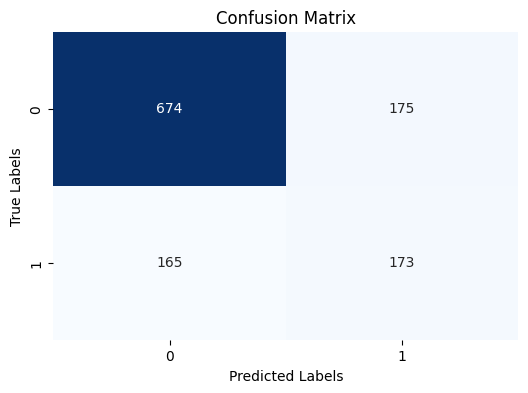


Class-wise Accuracy:
Class 0: 674/849 (79.39%)
Class 1: 173/338 (51.18%)

Precision-Recall Curve:


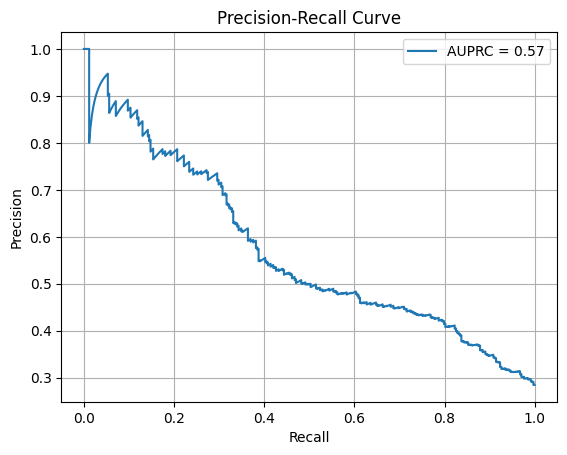


ROC Curve:


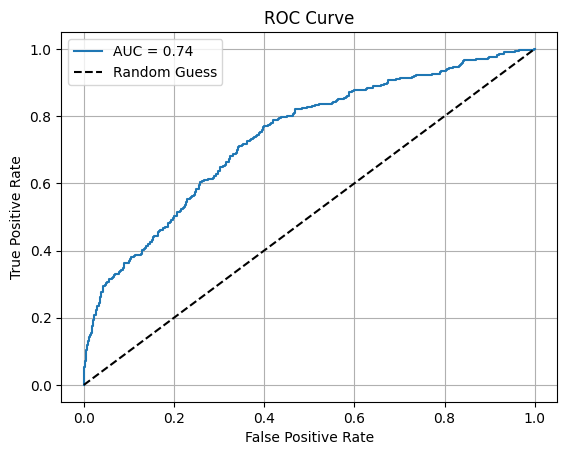


Mean F1 Score: 0.6515
Balanced Accuracy: 0.6529
Average AUPRC: 0.5673

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       849
           1       0.50      0.51      0.50       338

    accuracy                           0.71      1187
   macro avg       0.65      0.65      0.65      1187
weighted avg       0.72      0.71      0.71      1187

Fold No: 2
Epoch [1/100], Loss: 0.7480, Accuracy: 0.5190
Validation Loss: 0.7304, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6987, Accuracy: 0.5397
Validation Loss: 0.6571, Validation Accuracy: 0.5376
Epoch [3/100], Loss: 0.6840, Accuracy: 0.5899
Validation Loss: 0.6713, Validation Accuracy: 0.6357
Epoch [4/100], Loss: 0.6822, Accuracy: 0.6037
Validation Loss: 0.6991, Validation Accuracy: 0.6156
Epoch [5/100], Loss: 0.6509, Accuracy: 0.6794
Validation Loss: 0.6374, Validation Accuracy: 0.6876
Epoch [6/100], Loss: 0.6000, Accuracy: 0.7550
Validation Loss: 0.6148, V

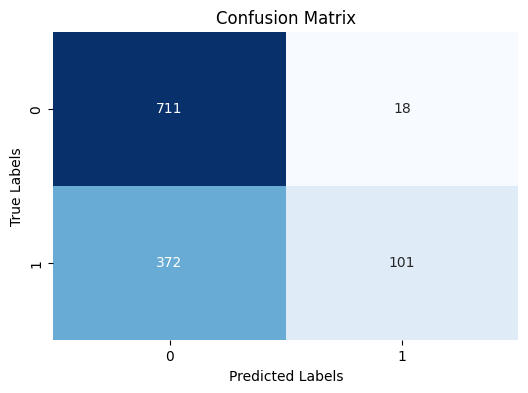


Class-wise Accuracy:
Class 0: 711/729 (97.53%)
Class 1: 101/473 (21.35%)

Precision-Recall Curve:


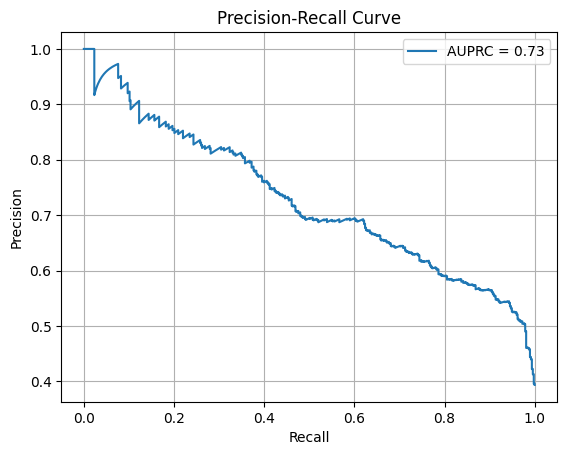


ROC Curve:


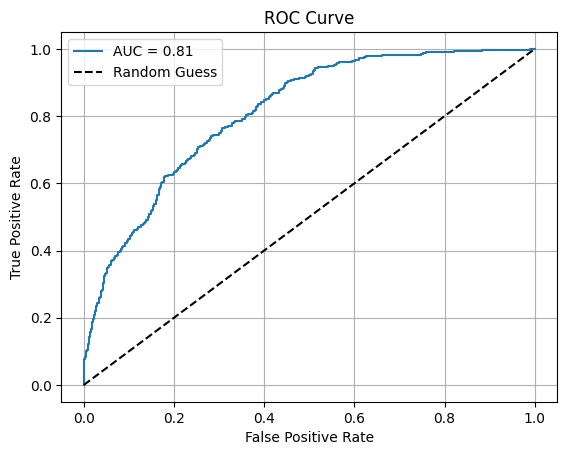


Mean F1 Score: 0.5630
Balanced Accuracy: 0.5944
Average AUPRC: 0.7264

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.98      0.78       729
           1       0.85      0.21      0.34       473

    accuracy                           0.68      1202
   macro avg       0.75      0.59      0.56      1202
weighted avg       0.73      0.68      0.61      1202

Fold No: 3
Epoch [1/100], Loss: 0.7754, Accuracy: 0.5065
Validation Loss: 0.6904, Validation Accuracy: 0.5426
Epoch [2/100], Loss: 0.6984, Accuracy: 0.5345
Validation Loss: 0.6667, Validation Accuracy: 0.5180
Epoch [3/100], Loss: 0.6803, Accuracy: 0.6004
Validation Loss: 0.6407, Validation Accuracy: 0.7325
Epoch [4/100], Loss: 0.6401, Accuracy: 0.6838
Validation Loss: 0.6272, Validation Accuracy: 0.7234
Epoch [5/100], Loss: 0.6318, Accuracy: 0.7248
Validation Loss: 0.6175, Validation Accuracy: 0.6981
Epoch [6/100], Loss: 0.6047, Accuracy: 0.7567
Validation Loss: 0.6234, V

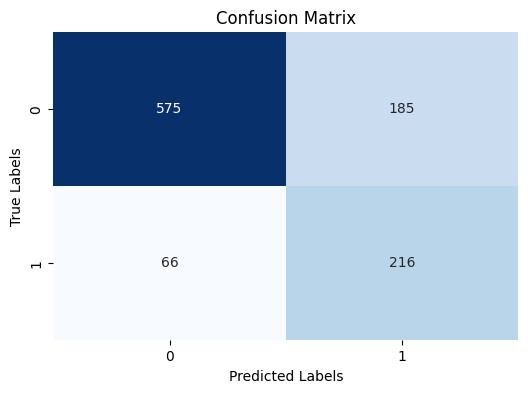


Class-wise Accuracy:
Class 0: 575/760 (75.66%)
Class 1: 216/282 (76.60%)

Precision-Recall Curve:


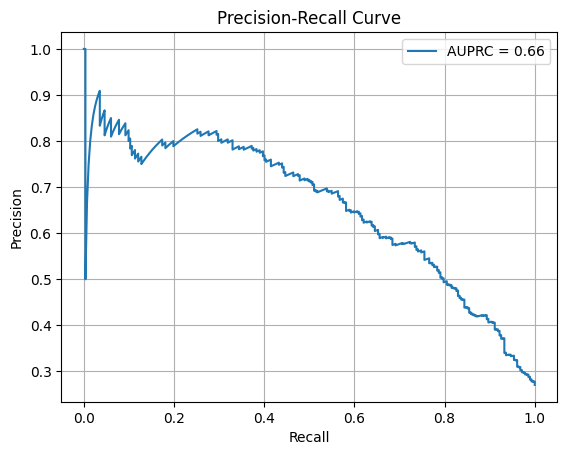


ROC Curve:


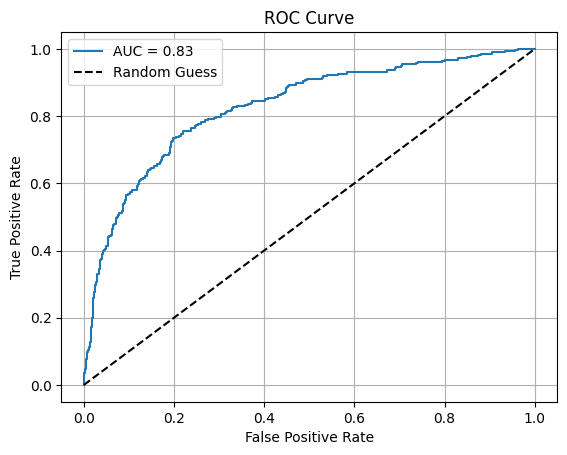


Mean F1 Score: 0.7267
Balanced Accuracy: 0.7613
Average AUPRC: 0.6571

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       760
           1       0.54      0.77      0.63       282

    accuracy                           0.76      1042
   macro avg       0.72      0.76      0.73      1042
weighted avg       0.80      0.76      0.77      1042

Fold No: 4
Epoch [1/100], Loss: 0.6914, Accuracy: 0.5774
Validation Loss: 0.7135, Validation Accuracy: 0.6129
Epoch [2/100], Loss: 0.6769, Accuracy: 0.6036
Validation Loss: 0.6335, Validation Accuracy: 0.5111
Epoch [3/100], Loss: 0.6626, Accuracy: 0.6484
Validation Loss: 0.7053, Validation Accuracy: 0.5527
Epoch [4/100], Loss: 0.6440, Accuracy: 0.6874
Validation Loss: 0.7796, Validation Accuracy: 0.5850
Epoch [5/100], Loss: 0.6181, Accuracy: 0.7239
Validation Loss: 0.6814, Validation Accuracy: 0.7028
Epoch [6/100], Loss: 0.6007, Accuracy: 0.7579
Validation Loss: 0.6731, V

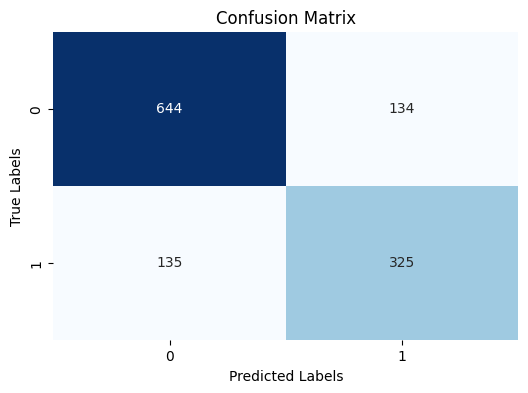


Class-wise Accuracy:
Class 0: 644/778 (82.78%)
Class 1: 325/460 (70.65%)

Precision-Recall Curve:


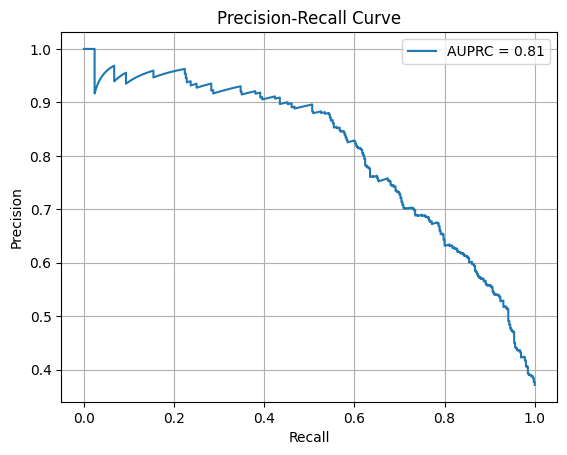


ROC Curve:


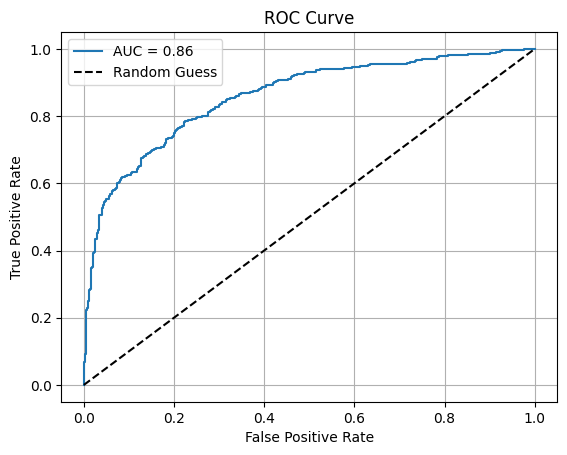


Mean F1 Score: 0.7673
Balanced Accuracy: 0.7671
Average AUPRC: 0.8064

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       778
           1       0.71      0.71      0.71       460

    accuracy                           0.78      1238
   macro avg       0.77      0.77      0.77      1238
weighted avg       0.78      0.78      0.78      1238

Fold No: 5
Epoch [1/100], Loss: 0.8032, Accuracy: 0.5050
Validation Loss: 0.6802, Validation Accuracy: 0.5039
Epoch [2/100], Loss: 0.6979, Accuracy: 0.5334
Validation Loss: 0.6931, Validation Accuracy: 0.5934
Epoch [3/100], Loss: 0.6972, Accuracy: 0.5316
Validation Loss: 0.6661, Validation Accuracy: 0.5185
Epoch [4/100], Loss: 0.6798, Accuracy: 0.5906
Validation Loss: 0.6902, Validation Accuracy: 0.5000
Epoch [5/100], Loss: 0.6772, Accuracy: 0.6125
Validation Loss: 0.6452, Validation Accuracy: 0.6533
Epoch [6/100], Loss: 0.6653, Accuracy: 0.6395
Validation Loss: 0.6741, V

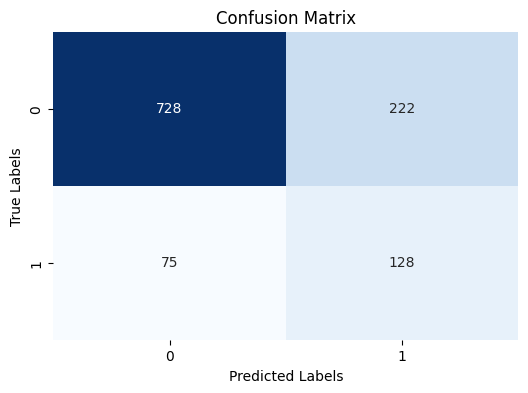


Class-wise Accuracy:
Class 0: 728/950 (76.63%)
Class 1: 128/203 (63.05%)

Precision-Recall Curve:


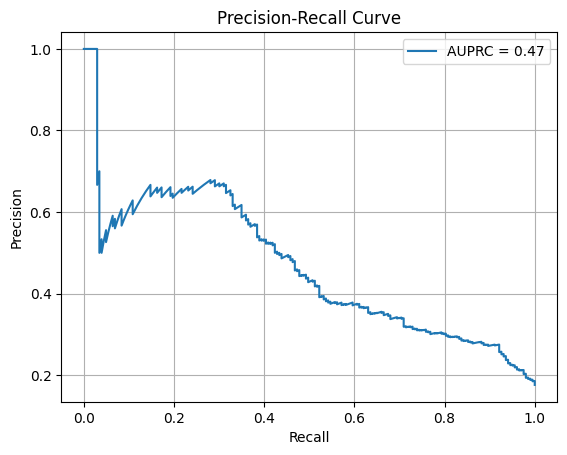


ROC Curve:


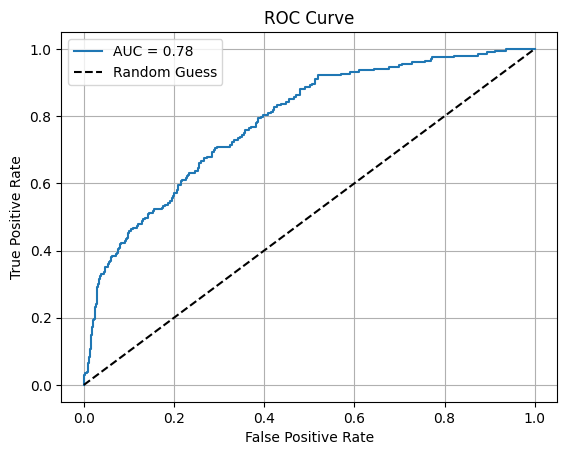


Mean F1 Score: 0.6468
Balanced Accuracy: 0.6984
Average AUPRC: 0.4656

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       950
           1       0.37      0.63      0.46       203

    accuracy                           0.74      1153
   macro avg       0.64      0.70      0.65      1153
weighted avg       0.81      0.74      0.77      1153


RESULTS FOR PARAMETER SET 1:
Balanced Accuracy for each fold: ['0.6529', '0.5944', '0.7613', '0.7671', '0.6984']
Average Balanced Accuracy across all folds: 0.6948
Best fold (Fold 4) class-wise accuracy: ['0.8278', '0.7065']
AUPRC for each fold: ['0.5673', '0.7264', '0.6571', '0.8064', '0.4656']
Average AUPRC across all folds: 0.6446

PARAMETER SET 2
Parameters: {'ff_dim': 512, 'dropout_rate': 0.29722015100615246, 'embed_dim': 64, 'learning_rate': 0.00046269394870735754, 'weight_decay': 0.00011711458551829446, 'batch_size': 10, 'num_heads': 4, 'num_transformer_blocks': 1

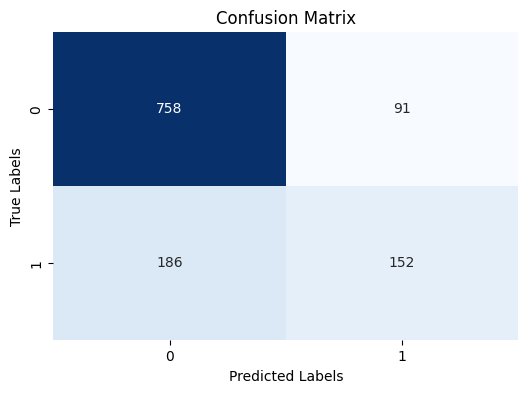


Class-wise Accuracy:
Class 0: 758/849 (89.28%)
Class 1: 152/338 (44.97%)

Precision-Recall Curve:


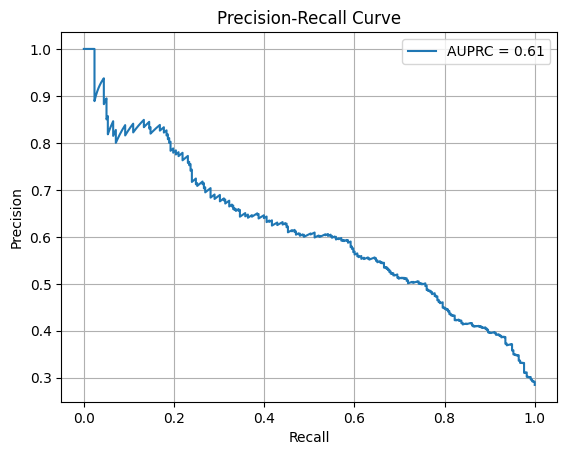


ROC Curve:


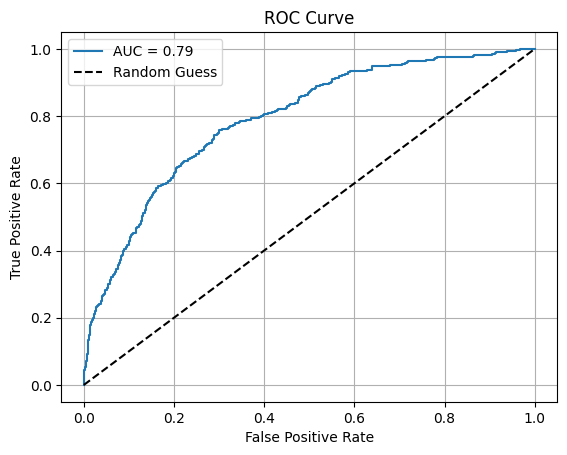


Mean F1 Score: 0.6844
Balanced Accuracy: 0.6713
Average AUPRC: 0.6125

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       849
           1       0.63      0.45      0.52       338

    accuracy                           0.77      1187
   macro avg       0.71      0.67      0.68      1187
weighted avg       0.75      0.77      0.75      1187

Fold No: 2
Epoch [1/100], Loss: 0.7373, Accuracy: 0.5143
Validation Loss: 0.7155, Validation Accuracy: 0.5636
Epoch [2/100], Loss: 0.6970, Accuracy: 0.5307
Validation Loss: 0.6565, Validation Accuracy: 0.5000
Epoch [3/100], Loss: 0.6970, Accuracy: 0.5037
Validation Loss: 0.6642, Validation Accuracy: 0.5000
Epoch [4/100], Loss: 0.6908, Accuracy: 0.5423
Validation Loss: 0.6809, Validation Accuracy: 0.5307
Epoch [5/100], Loss: 0.6752, Accuracy: 0.6042
Validation Loss: 0.6630, Validation Accuracy: 0.6575
Epoch [6/100], Loss: 0.6329, Accuracy: 0.7048
Validation Loss: 0.6366, V

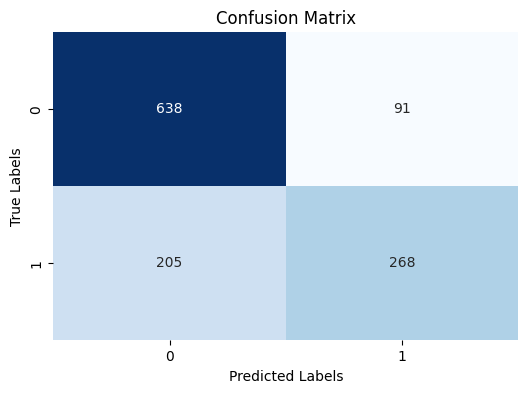


Class-wise Accuracy:
Class 0: 638/729 (87.52%)
Class 1: 268/473 (56.66%)

Precision-Recall Curve:


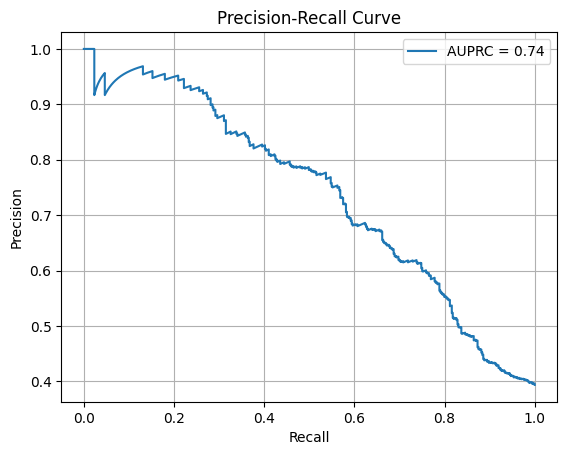


ROC Curve:


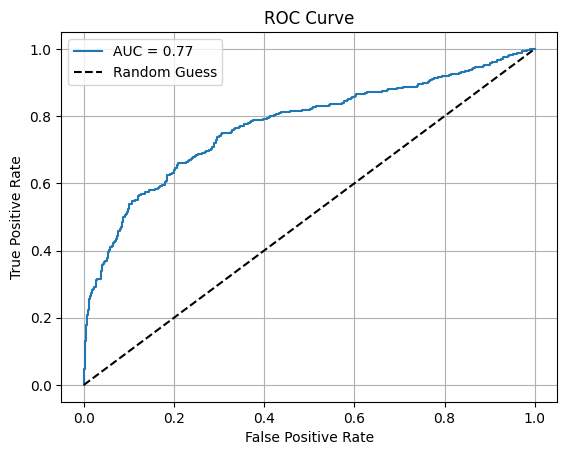


Mean F1 Score: 0.7280
Balanced Accuracy: 0.7209
Average AUPRC: 0.7385

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       729
           1       0.75      0.57      0.64       473

    accuracy                           0.75      1202
   macro avg       0.75      0.72      0.73      1202
weighted avg       0.75      0.75      0.75      1202

Fold No: 3
Epoch [1/100], Loss: 0.7285, Accuracy: 0.5260
Validation Loss: 0.6638, Validation Accuracy: 0.6290
Epoch [2/100], Loss: 0.6776, Accuracy: 0.6024
Validation Loss: 0.7043, Validation Accuracy: 0.5496
Epoch [3/100], Loss: 0.6714, Accuracy: 0.6274
Validation Loss: 0.6330, Validation Accuracy: 0.6560
Epoch [4/100], Loss: 0.6428, Accuracy: 0.6823
Validation Loss: 0.6607, Validation Accuracy: 0.5753
Epoch [5/100], Loss: 0.6193, Accuracy: 0.7383
Validation Loss: 0.6199, Validation Accuracy: 0.6727
Epoch [6/100], Loss: 0.5993, Accuracy: 0.7617
Validation Loss: 0.6146, V

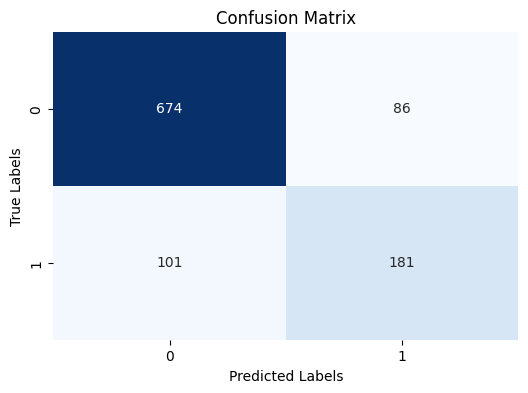


Class-wise Accuracy:
Class 0: 674/760 (88.68%)
Class 1: 181/282 (64.18%)

Precision-Recall Curve:


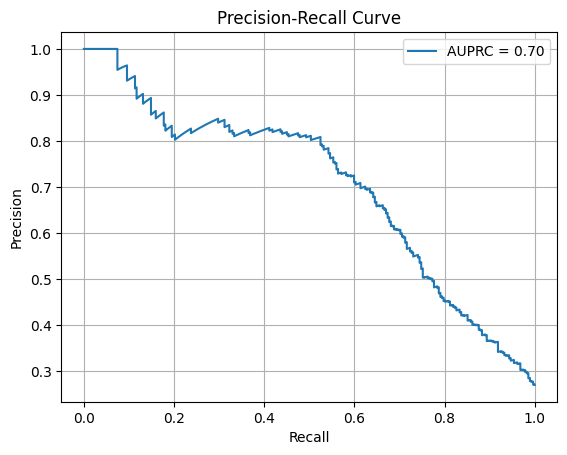


ROC Curve:


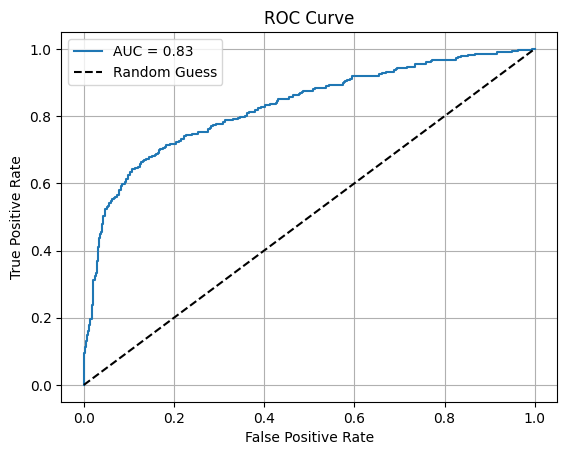


Mean F1 Score: 0.7688
Balanced Accuracy: 0.7643
Average AUPRC: 0.7024

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       760
           1       0.68      0.64      0.66       282

    accuracy                           0.82      1042
   macro avg       0.77      0.76      0.77      1042
weighted avg       0.82      0.82      0.82      1042

Fold No: 4
Epoch [1/100], Loss: 0.6975, Accuracy: 0.5661
Validation Loss: 0.6559, Validation Accuracy: 0.5617
Epoch [2/100], Loss: 0.6588, Accuracy: 0.6469
Validation Loss: 0.7058, Validation Accuracy: 0.6497
Epoch [3/100], Loss: 0.6323, Accuracy: 0.7110
Validation Loss: 0.6280, Validation Accuracy: 0.6727
Epoch [4/100], Loss: 0.6196, Accuracy: 0.7322
Validation Loss: 0.6477, Validation Accuracy: 0.7027
Epoch [5/100], Loss: 0.5929, Accuracy: 0.7781
Validation Loss: 0.6131, Validation Accuracy: 0.7411
Epoch [6/100], Loss: 0.5740, Accuracy: 0.7983
Validation Loss: 0.6022, V

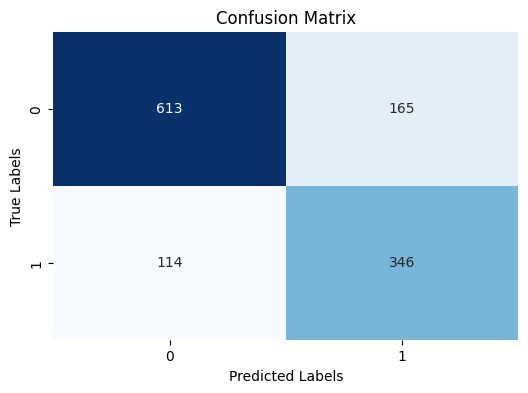


Class-wise Accuracy:
Class 0: 613/778 (78.79%)
Class 1: 346/460 (75.22%)

Precision-Recall Curve:


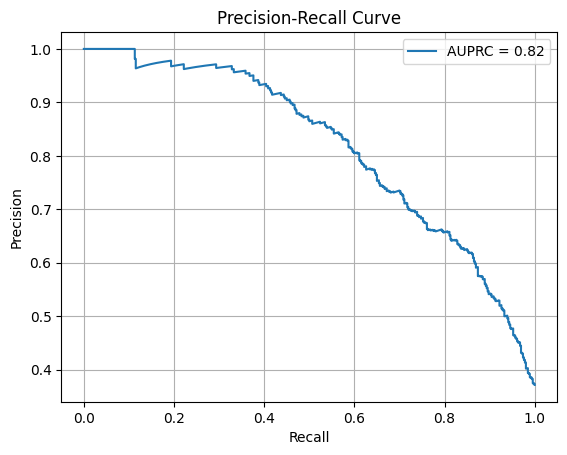


ROC Curve:


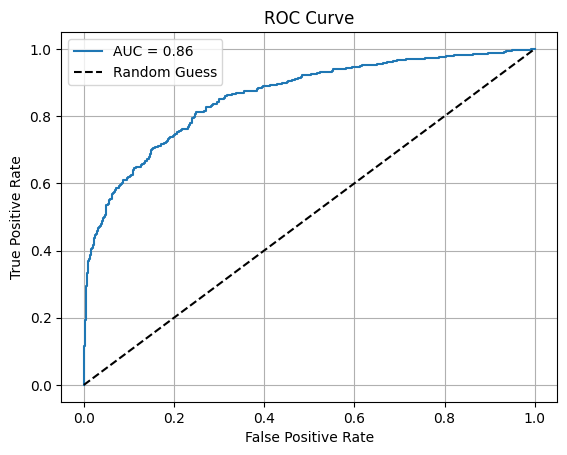


Mean F1 Score: 0.7636
Balanced Accuracy: 0.7700
Average AUPRC: 0.8172

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       778
           1       0.68      0.75      0.71       460

    accuracy                           0.77      1238
   macro avg       0.76      0.77      0.76      1238
weighted avg       0.78      0.77      0.78      1238

Fold No: 5
Epoch [1/100], Loss: 0.7046, Accuracy: 0.5686
Validation Loss: 0.6786, Validation Accuracy: 0.6560
Epoch [2/100], Loss: 0.6722, Accuracy: 0.6194
Validation Loss: 0.6476, Validation Accuracy: 0.6879
Epoch [3/100], Loss: 0.6547, Accuracy: 0.6642
Validation Loss: 0.6522, Validation Accuracy: 0.6949
Epoch [4/100], Loss: 0.6319, Accuracy: 0.7127
Validation Loss: 0.6067, Validation Accuracy: 0.7409
Epoch [5/100], Loss: 0.6078, Accuracy: 0.7530
Validation Loss: 0.5887, Validation Accuracy: 0.7622
Epoch [6/100], Loss: 0.5756, Accuracy: 0.8175
Validation Loss: 0.5806, V

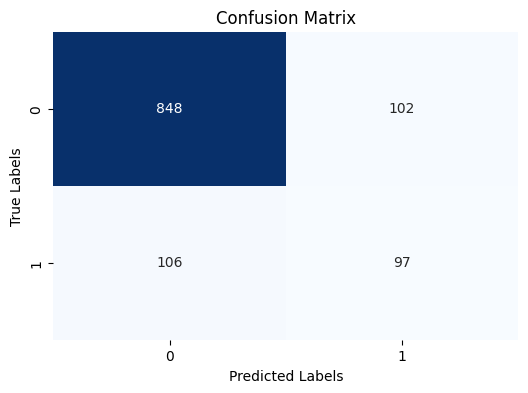


Class-wise Accuracy:
Class 0: 848/950 (89.26%)
Class 1: 97/203 (47.78%)

Precision-Recall Curve:


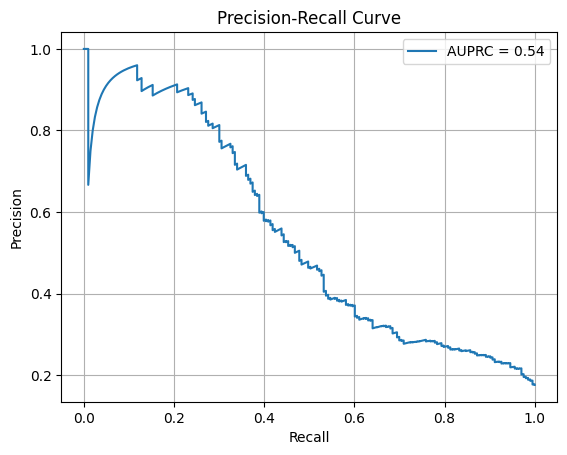


ROC Curve:


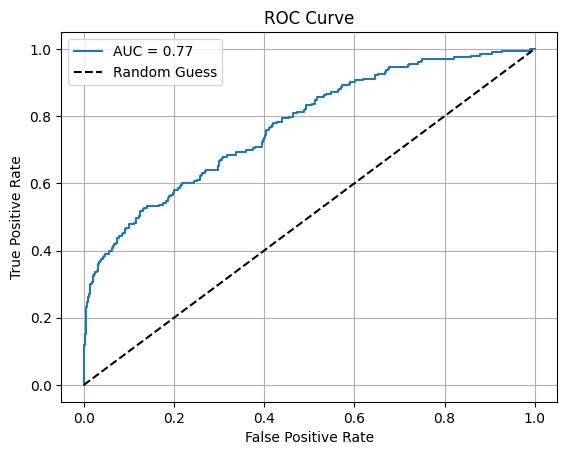


Mean F1 Score: 0.6867
Balanced Accuracy: 0.6852
Average AUPRC: 0.5397

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       950
           1       0.49      0.48      0.48       203

    accuracy                           0.82      1153
   macro avg       0.69      0.69      0.69      1153
weighted avg       0.82      0.82      0.82      1153


RESULTS FOR PARAMETER SET 2:
Balanced Accuracy for each fold: ['0.6713', '0.7209', '0.7643', '0.7700', '0.6852']
Average Balanced Accuracy across all folds: 0.7224
Best fold (Fold 4) class-wise accuracy: ['0.7879', '0.7522']
AUPRC for each fold: ['0.6125', '0.7385', '0.7024', '0.8172', '0.5397']
Average AUPRC across all folds: 0.6821

PARAMETER SET 3
Parameters: {'ff_dim': 32, 'dropout_rate': 0.1069229904003147, 'embed_dim': 256, 'learning_rate': 0.00015525256911280537, 'weight_decay': 3.149880823421316e-05, 'batch_size': 16, 'num_heads': 4, 'num_transformer_blocks': 4}


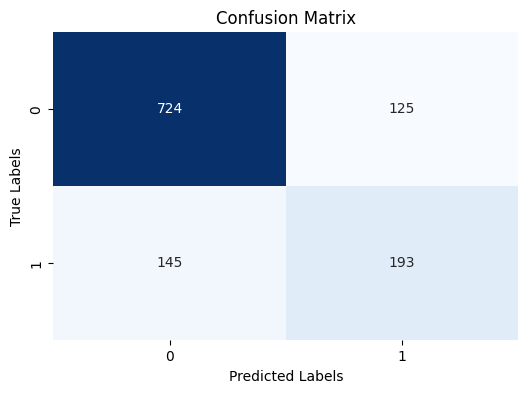


Class-wise Accuracy:
Class 0: 724/849 (85.28%)
Class 1: 193/338 (57.10%)

Precision-Recall Curve:


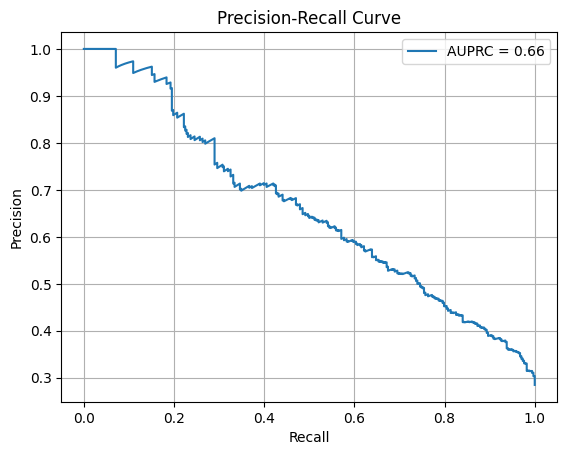


ROC Curve:


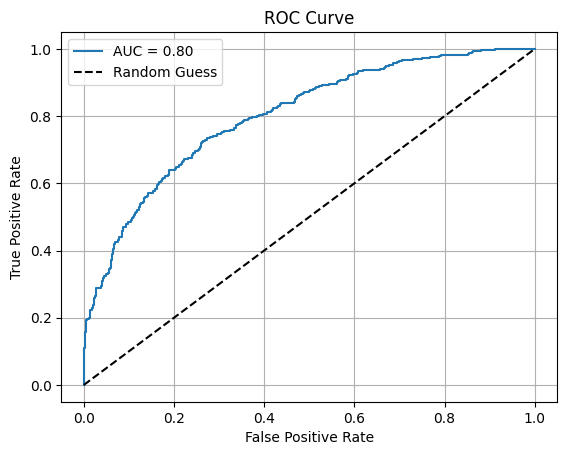


Mean F1 Score: 0.7156
Balanced Accuracy: 0.7119
Average AUPRC: 0.6594

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       849
           1       0.61      0.57      0.59       338

    accuracy                           0.77      1187
   macro avg       0.72      0.71      0.72      1187
weighted avg       0.77      0.77      0.77      1187

Fold No: 2
Epoch [1/100], Loss: 0.7487, Accuracy: 0.5026
Validation Loss: 0.6575, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6993, Accuracy: 0.5328
Validation Loss: 0.7247, Validation Accuracy: 0.5162
Epoch [3/100], Loss: 0.6942, Accuracy: 0.5354
Validation Loss: 0.6341, Validation Accuracy: 0.5000
Epoch [4/100], Loss: 0.6582, Accuracy: 0.6624
Validation Loss: 0.6446, Validation Accuracy: 0.6023
Epoch [5/100], Loss: 0.6142, Accuracy: 0.7317
Validation Loss: 0.6585, Validation Accuracy: 0.6988
Epoch [6/100], Loss: 0.6010, Accuracy: 0.7677
Validation Loss: 0.6460, V

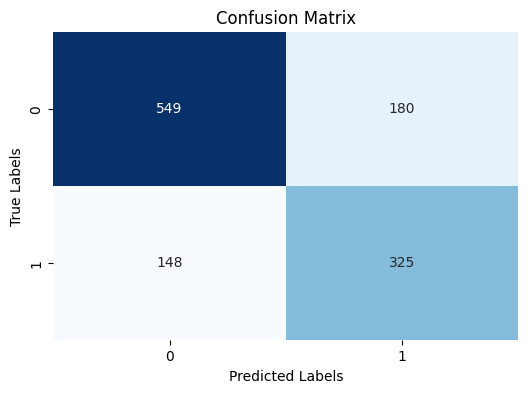


Class-wise Accuracy:
Class 0: 549/729 (75.31%)
Class 1: 325/473 (68.71%)

Precision-Recall Curve:


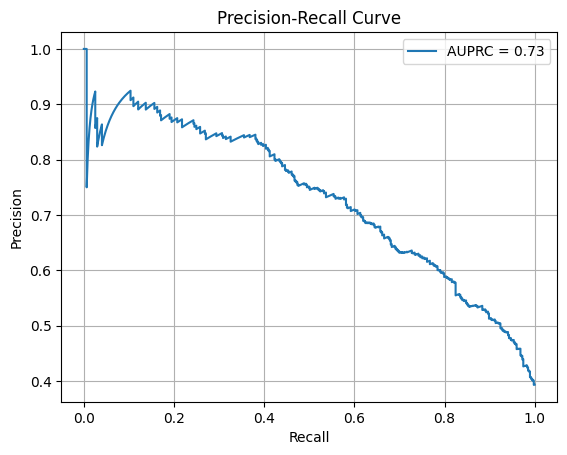


ROC Curve:


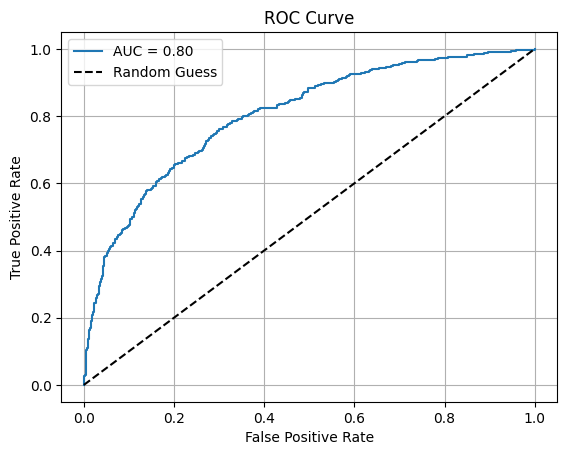


Mean F1 Score: 0.7173
Balanced Accuracy: 0.7201
Average AUPRC: 0.7298

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       729
           1       0.64      0.69      0.66       473

    accuracy                           0.73      1202
   macro avg       0.72      0.72      0.72      1202
weighted avg       0.73      0.73      0.73      1202

Fold No: 3
Epoch [1/100], Loss: 0.7072, Accuracy: 0.5255
Validation Loss: 0.6628, Validation Accuracy: 0.6476
Epoch [2/100], Loss: 0.6856, Accuracy: 0.5689
Validation Loss: 0.6599, Validation Accuracy: 0.6418
Epoch [3/100], Loss: 0.6759, Accuracy: 0.6139
Validation Loss: 0.7127, Validation Accuracy: 0.6238
Epoch [4/100], Loss: 0.6792, Accuracy: 0.6054
Validation Loss: 0.6577, Validation Accuracy: 0.6769
Epoch [5/100], Loss: 0.6640, Accuracy: 0.6354
Validation Loss: 0.6617, Validation Accuracy: 0.6752
Epoch [6/100], Loss: 0.6598, Accuracy: 0.6444
Validation Loss: 0.6394, V

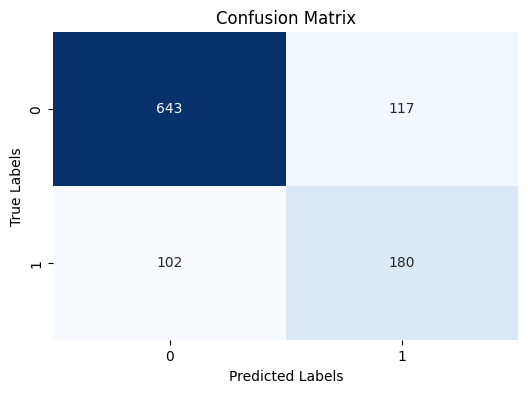


Class-wise Accuracy:
Class 0: 643/760 (84.61%)
Class 1: 180/282 (63.83%)

Precision-Recall Curve:


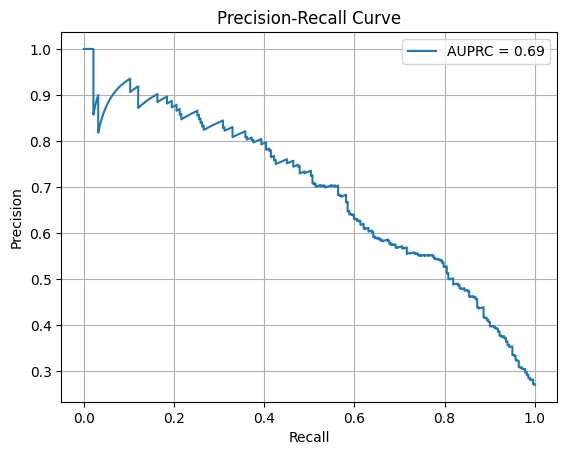


ROC Curve:


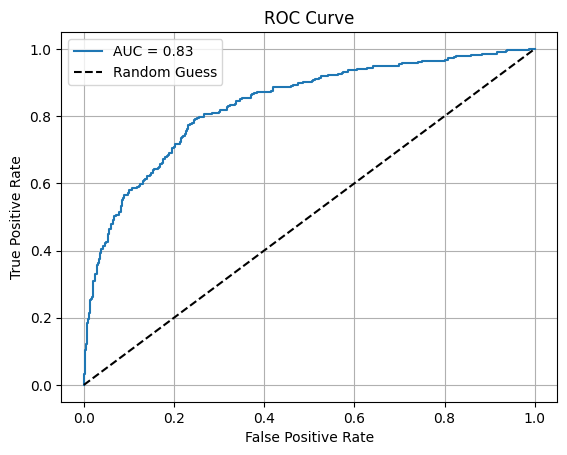


Mean F1 Score: 0.7381
Balanced Accuracy: 0.7422
Average AUPRC: 0.6876

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       760
           1       0.61      0.64      0.62       282

    accuracy                           0.79      1042
   macro avg       0.73      0.74      0.74      1042
weighted avg       0.79      0.79      0.79      1042

Fold No: 4
Epoch [1/100], Loss: 0.7383, Accuracy: 0.5340
Validation Loss: 0.7178, Validation Accuracy: 0.5113
Epoch [2/100], Loss: 0.6895, Accuracy: 0.5478
Validation Loss: 0.6620, Validation Accuracy: 0.5122
Epoch [3/100], Loss: 0.6802, Accuracy: 0.5986
Validation Loss: 0.6685, Validation Accuracy: 0.5870
Epoch [4/100], Loss: 0.6640, Accuracy: 0.6381
Validation Loss: 0.6178, Validation Accuracy: 0.6019
Epoch [5/100], Loss: 0.6284, Accuracy: 0.7145
Validation Loss: 0.6555, Validation Accuracy: 0.7127
Epoch [6/100], Loss: 0.6091, Accuracy: 0.7530
Validation Loss: 0.6064, V

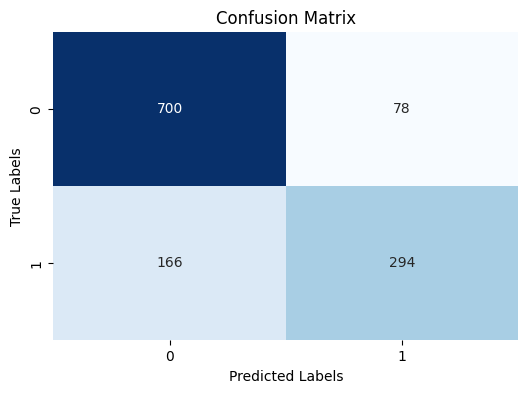


Class-wise Accuracy:
Class 0: 700/778 (89.97%)
Class 1: 294/460 (63.91%)

Precision-Recall Curve:


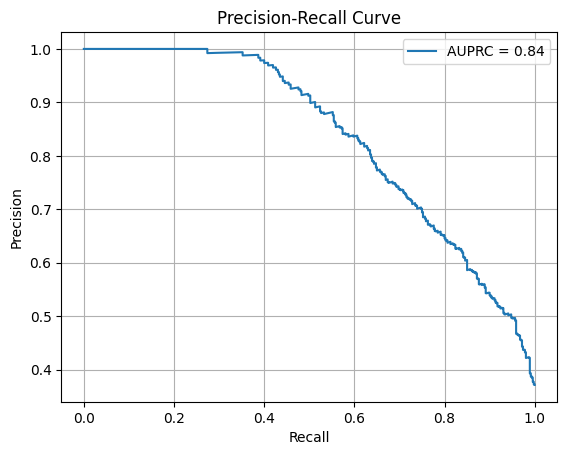


ROC Curve:


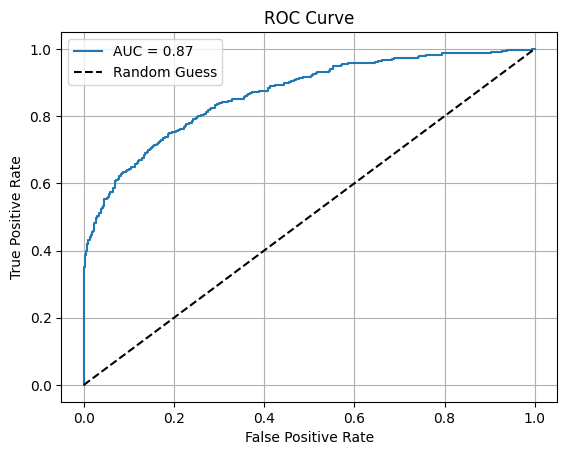


Mean F1 Score: 0.7792
Balanced Accuracy: 0.7694
Average AUPRC: 0.8352

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       778
           1       0.79      0.64      0.71       460

    accuracy                           0.80      1238
   macro avg       0.80      0.77      0.78      1238
weighted avg       0.80      0.80      0.80      1238

Fold No: 5
Epoch [1/100], Loss: 0.7637, Accuracy: 0.5183
Validation Loss: 0.7170, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6987, Accuracy: 0.5137
Validation Loss: 0.7148, Validation Accuracy: 0.5406
Epoch [3/100], Loss: 0.6944, Accuracy: 0.5448
Validation Loss: 0.6574, Validation Accuracy: 0.6193
Epoch [4/100], Loss: 0.6833, Accuracy: 0.5791
Validation Loss: 0.6653, Validation Accuracy: 0.5616
Epoch [5/100], Loss: 0.6680, Accuracy: 0.6349
Validation Loss: 0.6149, Validation Accuracy: 0.7190
Epoch [6/100], Loss: 0.6424, Accuracy: 0.7004
Validation Loss: 0.6555, V

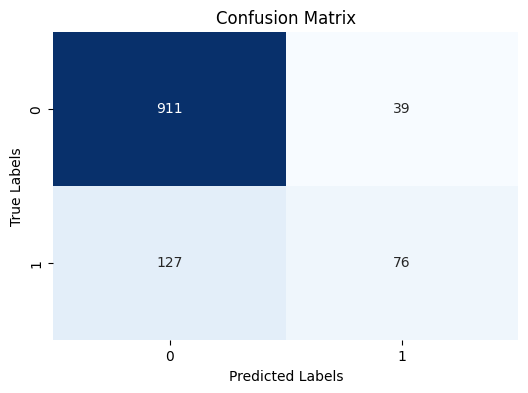


Class-wise Accuracy:
Class 0: 911/950 (95.89%)
Class 1: 76/203 (37.44%)

Precision-Recall Curve:


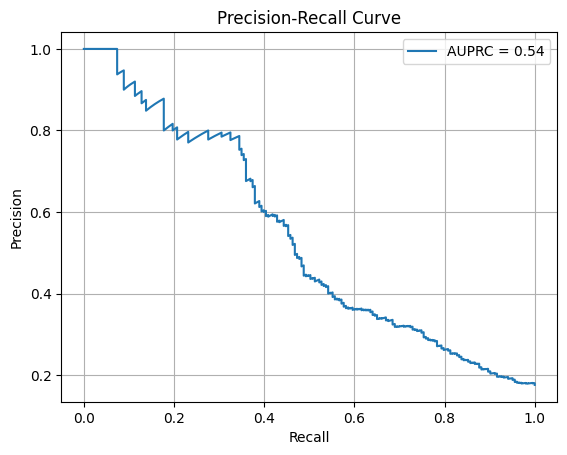


ROC Curve:


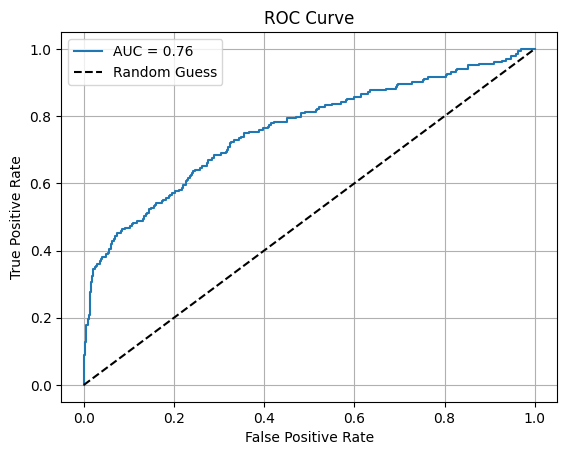


Mean F1 Score: 0.6972
Balanced Accuracy: 0.6667
Average AUPRC: 0.5364

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       950
           1       0.66      0.37      0.48       203

    accuracy                           0.86      1153
   macro avg       0.77      0.67      0.70      1153
weighted avg       0.84      0.86      0.84      1153


RESULTS FOR PARAMETER SET 3:
Balanced Accuracy for each fold: ['0.7119', '0.7201', '0.7422', '0.7694', '0.6667']
Average Balanced Accuracy across all folds: 0.7221
Best fold (Fold 4) class-wise accuracy: ['0.8997', '0.6391']
AUPRC for each fold: ['0.6594', '0.7298', '0.6876', '0.8352', '0.5364']
Average AUPRC across all folds: 0.6897

PARAMETER SET 4
Parameters: {'ff_dim': 32, 'dropout_rate': 0.10945213351235199, 'embed_dim': 256, 'learning_rate': 0.00015701457915942213, 'weight_decay': 2.5321469842206672e-05, 'batch_size': 16, 'num_heads': 4, 'num_transformer_blocks': 4

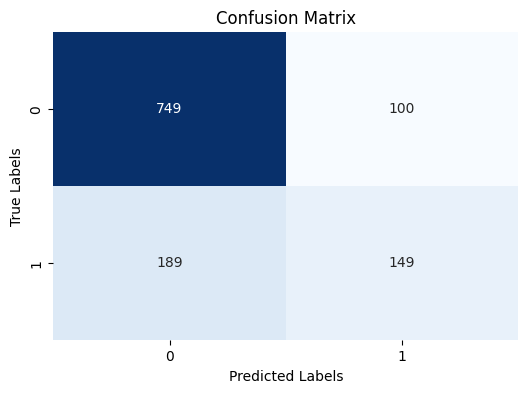


Class-wise Accuracy:
Class 0: 749/849 (88.22%)
Class 1: 149/338 (44.08%)

Precision-Recall Curve:


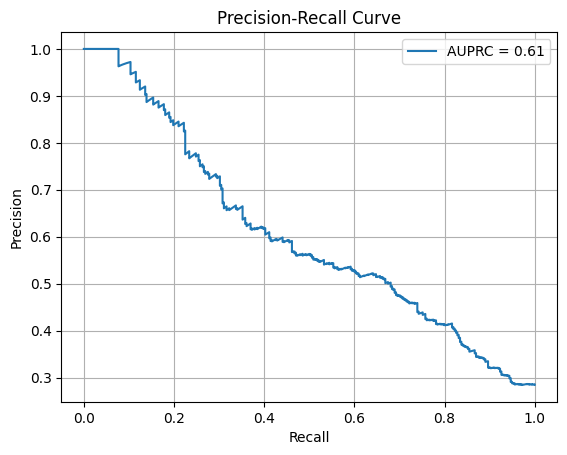


ROC Curve:


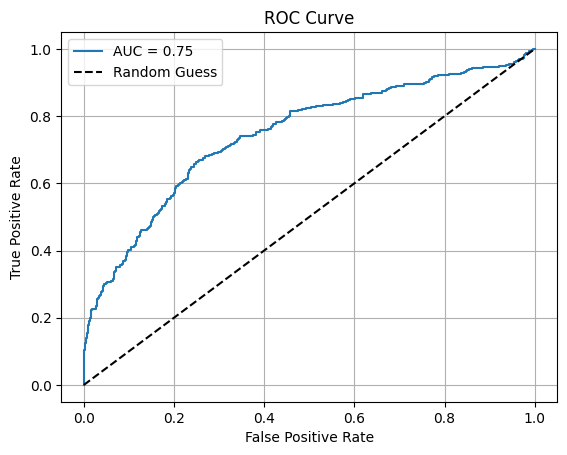


Mean F1 Score: 0.6730
Balanced Accuracy: 0.6615
Average AUPRC: 0.6050

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       849
           1       0.60      0.44      0.51       338

    accuracy                           0.76      1187
   macro avg       0.70      0.66      0.67      1187
weighted avg       0.74      0.76      0.74      1187

Fold No: 2
Epoch [1/100], Loss: 0.7466, Accuracy: 0.5175
Validation Loss: 0.6799, Validation Accuracy: 0.6084
Epoch [2/100], Loss: 0.6780, Accuracy: 0.6048
Validation Loss: 0.6353, Validation Accuracy: 0.6375
Epoch [3/100], Loss: 0.6732, Accuracy: 0.5984
Validation Loss: 0.6502, Validation Accuracy: 0.6129
Epoch [4/100], Loss: 0.6670, Accuracy: 0.6233
Validation Loss: 0.6395, Validation Accuracy: 0.6310
Epoch [5/100], Loss: 0.6330, Accuracy: 0.7074
Validation Loss: 0.6219, Validation Accuracy: 0.5997
Epoch [6/100], Loss: 0.5945, Accuracy: 0.7667
Validation Loss: 0.6060, V

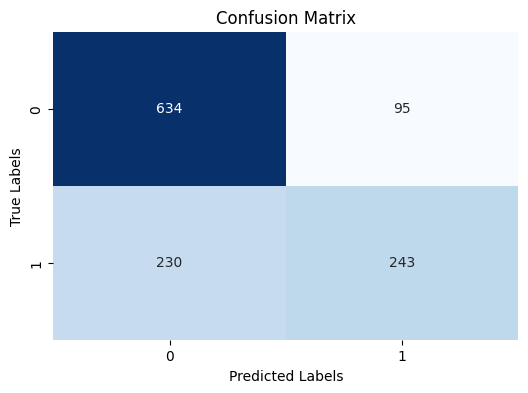


Class-wise Accuracy:
Class 0: 634/729 (86.97%)
Class 1: 243/473 (51.37%)

Precision-Recall Curve:


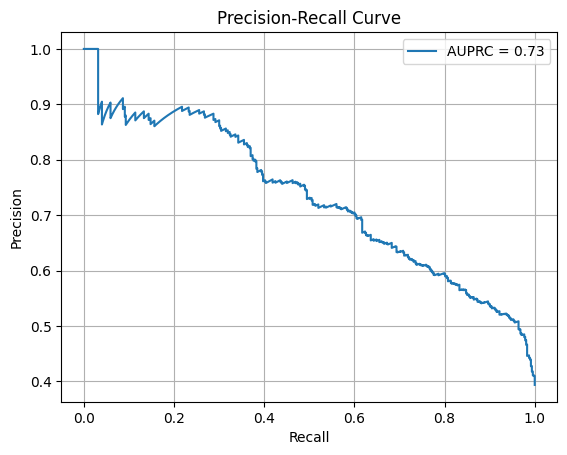


ROC Curve:


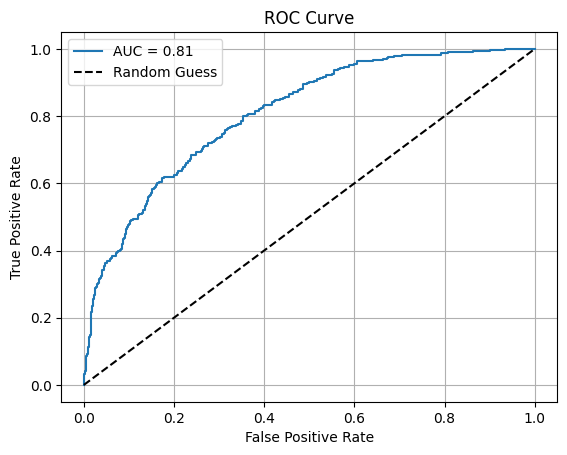


Mean F1 Score: 0.6976
Balanced Accuracy: 0.6917
Average AUPRC: 0.7311

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.80       729
           1       0.72      0.51      0.60       473

    accuracy                           0.73      1202
   macro avg       0.73      0.69      0.70      1202
weighted avg       0.73      0.73      0.72      1202

Fold No: 3
Epoch [1/100], Loss: 0.7900, Accuracy: 0.5170
Validation Loss: 0.7559, Validation Accuracy: 0.5143
Epoch [2/100], Loss: 0.7045, Accuracy: 0.5330
Validation Loss: 0.6705, Validation Accuracy: 0.5843
Epoch [3/100], Loss: 0.6832, Accuracy: 0.5939
Validation Loss: 0.6888, Validation Accuracy: 0.5000
Epoch [4/100], Loss: 0.6634, Accuracy: 0.6389
Validation Loss: 0.6760, Validation Accuracy: 0.6607
Epoch [5/100], Loss: 0.6516, Accuracy: 0.6828
Validation Loss: 0.6240, Validation Accuracy: 0.6887
Epoch [6/100], Loss: 0.6165, Accuracy: 0.7532
Validation Loss: 0.6304, V

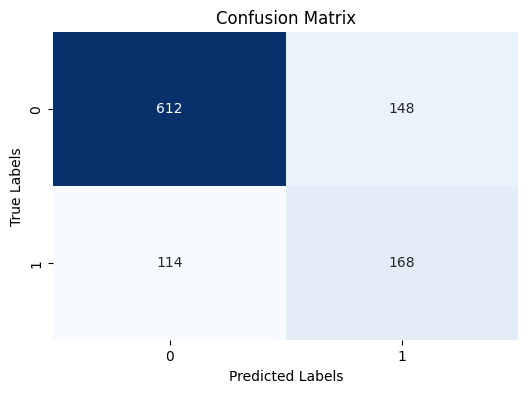


Class-wise Accuracy:
Class 0: 612/760 (80.53%)
Class 1: 168/282 (59.57%)

Precision-Recall Curve:


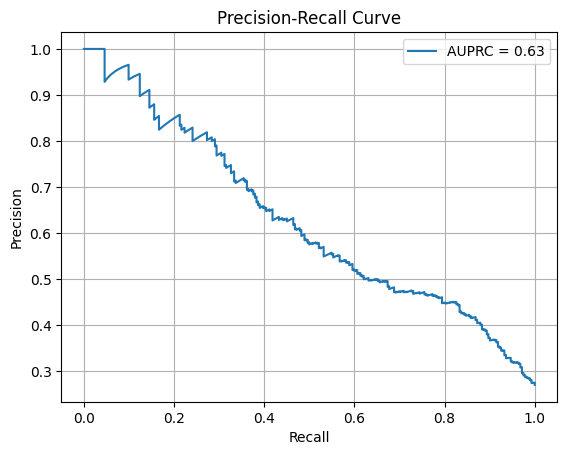


ROC Curve:


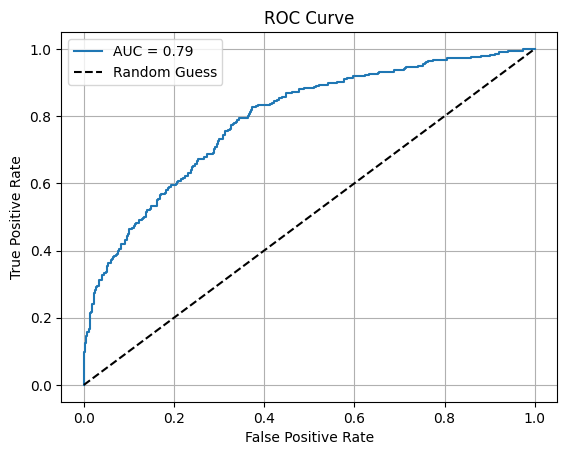


Mean F1 Score: 0.6928
Balanced Accuracy: 0.7005
Average AUPRC: 0.6270

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       760
           1       0.53      0.60      0.56       282

    accuracy                           0.75      1042
   macro avg       0.69      0.70      0.69      1042
weighted avg       0.76      0.75      0.75      1042

Fold No: 4
Epoch [1/100], Loss: 0.7594, Accuracy: 0.5281
Validation Loss: 0.7207, Validation Accuracy: 0.5118
Epoch [2/100], Loss: 0.7033, Accuracy: 0.5138
Validation Loss: 0.7162, Validation Accuracy: 0.5207
Epoch [3/100], Loss: 0.6980, Accuracy: 0.5404
Validation Loss: 0.6996, Validation Accuracy: 0.5468
Epoch [4/100], Loss: 0.6828, Accuracy: 0.5907
Validation Loss: 0.7062, Validation Accuracy: 0.5928
Epoch [5/100], Loss: 0.6577, Accuracy: 0.6617
Validation Loss: 0.7908, Validation Accuracy: 0.6213
Epoch [6/100], Loss: 0.6433, Accuracy: 0.6893
Validation Loss: 0.6435, V

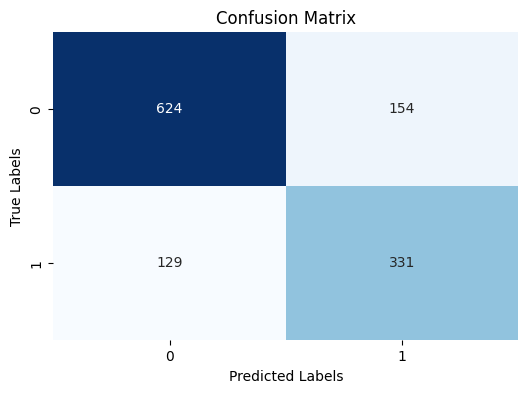


Class-wise Accuracy:
Class 0: 624/778 (80.21%)
Class 1: 331/460 (71.96%)

Precision-Recall Curve:


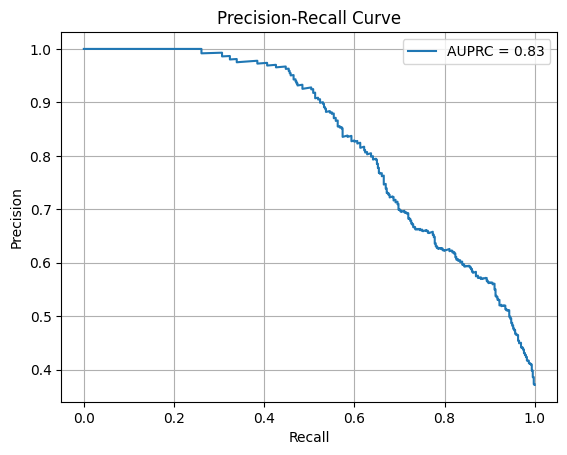


ROC Curve:


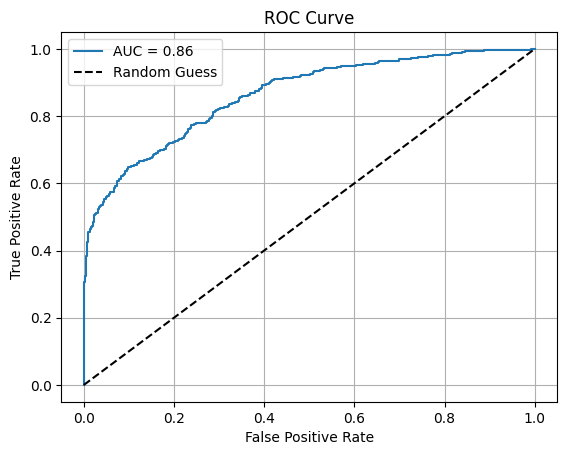


Mean F1 Score: 0.7578
Balanced Accuracy: 0.7608
Average AUPRC: 0.8317

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       778
           1       0.68      0.72      0.70       460

    accuracy                           0.77      1238
   macro avg       0.76      0.76      0.76      1238
weighted avg       0.77      0.77      0.77      1238

Fold No: 5
Epoch [1/100], Loss: 0.7847, Accuracy: 0.4995
Validation Loss: 0.6750, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6991, Accuracy: 0.5256
Validation Loss: 0.6966, Validation Accuracy: 0.5383
Epoch [3/100], Loss: 0.6998, Accuracy: 0.5311
Validation Loss: 0.6821, Validation Accuracy: 0.5587
Epoch [4/100], Loss: 0.6885, Accuracy: 0.5700
Validation Loss: 0.6444, Validation Accuracy: 0.6255
Epoch [5/100], Loss: 0.6624, Accuracy: 0.6414
Validation Loss: 0.7509, Validation Accuracy: 0.5295
Epoch [6/100], Loss: 0.6465, Accuracy: 0.6816
Validation Loss: 0.6459, V

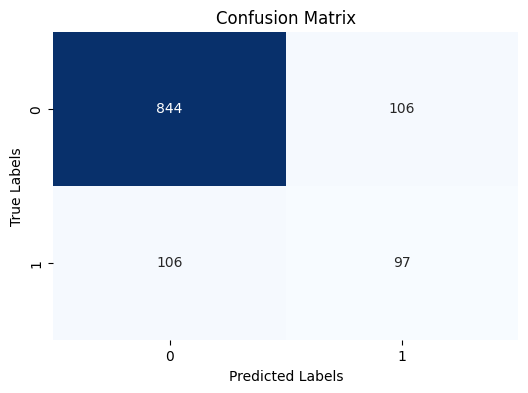


Class-wise Accuracy:
Class 0: 844/950 (88.84%)
Class 1: 97/203 (47.78%)

Precision-Recall Curve:


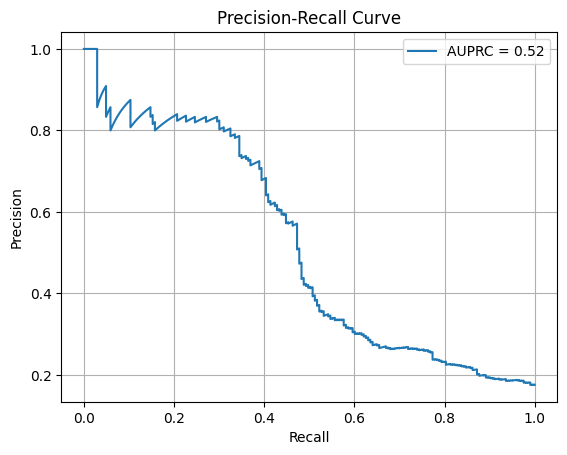


ROC Curve:


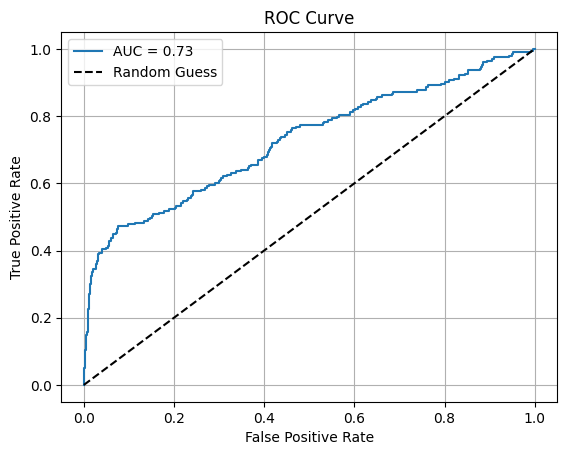


Mean F1 Score: 0.6831
Balanced Accuracy: 0.6831
Average AUPRC: 0.5153

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       950
           1       0.48      0.48      0.48       203

    accuracy                           0.82      1153
   macro avg       0.68      0.68      0.68      1153
weighted avg       0.82      0.82      0.82      1153


RESULTS FOR PARAMETER SET 4:
Balanced Accuracy for each fold: ['0.6615', '0.6917', '0.7005', '0.7608', '0.6831']
Average Balanced Accuracy across all folds: 0.6995
Best fold (Fold 4) class-wise accuracy: ['0.8021', '0.7196']
AUPRC for each fold: ['0.6050', '0.7311', '0.6270', '0.8317', '0.5153']
Average AUPRC across all folds: 0.6620

PARAMETER SET 5
Parameters: {'ff_dim': 256, 'dropout_rate': 0.2051768973953511, 'embed_dim': 128, 'learning_rate': 0.00011833585465114953, 'weight_decay': 1.384051137092256e-05, 'batch_size': 10, 'num_heads': 2, 'num_transformer_blocks': 8}

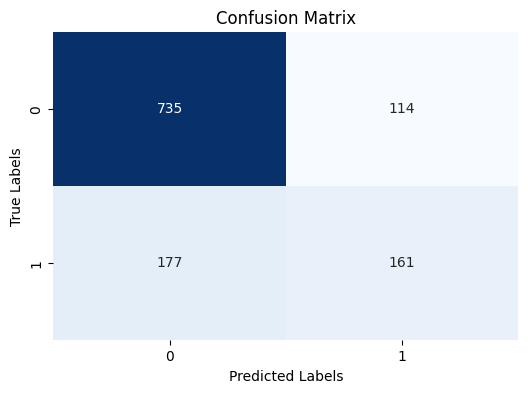


Class-wise Accuracy:
Class 0: 735/849 (86.57%)
Class 1: 161/338 (47.63%)

Precision-Recall Curve:


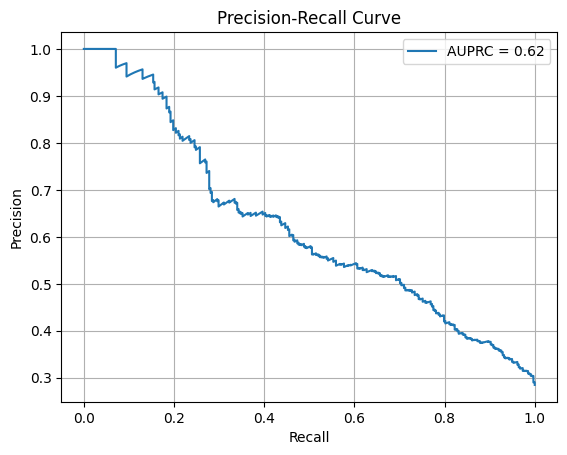


ROC Curve:


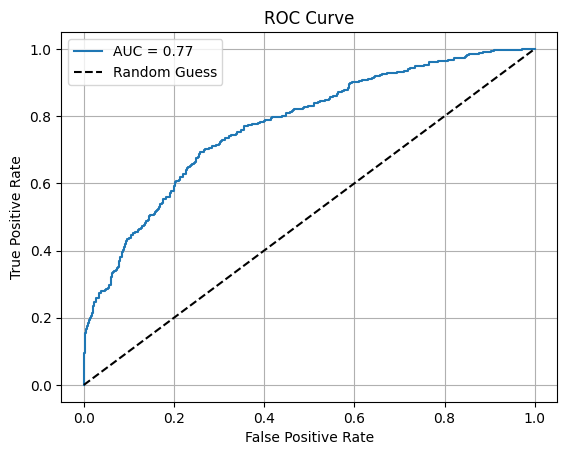


Mean F1 Score: 0.6800
Balanced Accuracy: 0.6710
Average AUPRC: 0.6220

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       849
           1       0.59      0.48      0.53       338

    accuracy                           0.75      1187
   macro avg       0.70      0.67      0.68      1187
weighted avg       0.74      0.75      0.75      1187

Fold No: 2
Epoch [1/100], Loss: 0.7143, Accuracy: 0.5074
Validation Loss: 0.7066, Validation Accuracy: 0.5696
Epoch [2/100], Loss: 0.7021, Accuracy: 0.5132
Validation Loss: 0.6832, Validation Accuracy: 0.5436
Epoch [3/100], Loss: 0.6943, Accuracy: 0.5540
Validation Loss: 0.6565, Validation Accuracy: 0.5000
Epoch [4/100], Loss: 0.6721, Accuracy: 0.6090
Validation Loss: 0.7181, Validation Accuracy: 0.6162
Epoch [5/100], Loss: 0.6476, Accuracy: 0.6921
Validation Loss: 0.7220, Validation Accuracy: 0.6521
Epoch [6/100], Loss: 0.6269, Accuracy: 0.7291
Validation Loss: 0.6691, V

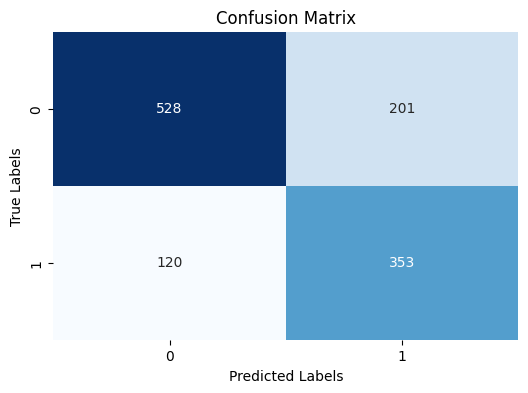


Class-wise Accuracy:
Class 0: 528/729 (72.43%)
Class 1: 353/473 (74.63%)

Precision-Recall Curve:


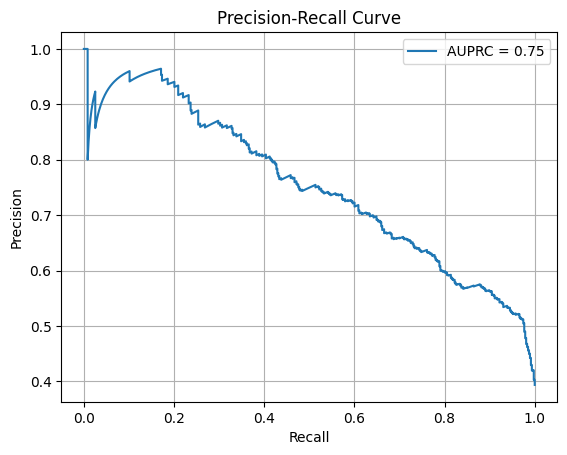


ROC Curve:


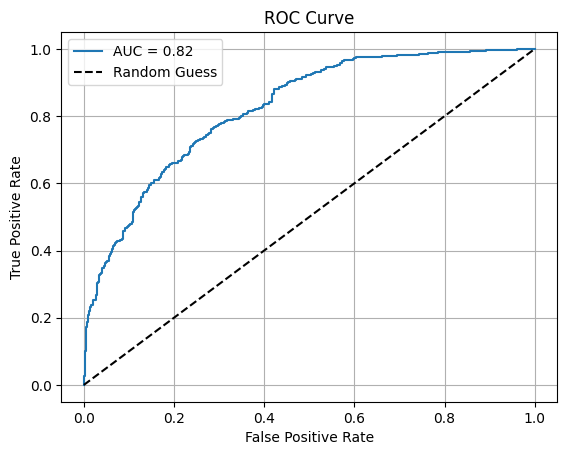


Mean F1 Score: 0.7272
Balanced Accuracy: 0.7353
Average AUPRC: 0.7523

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.77       729
           1       0.64      0.75      0.69       473

    accuracy                           0.73      1202
   macro avg       0.73      0.74      0.73      1202
weighted avg       0.74      0.73      0.74      1202

Fold No: 3
Epoch [1/100], Loss: 0.7096, Accuracy: 0.5050
Validation Loss: 0.6793, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6956, Accuracy: 0.5485
Validation Loss: 0.6745, Validation Accuracy: 0.6508
Epoch [3/100], Loss: 0.6677, Accuracy: 0.6254
Validation Loss: 0.6358, Validation Accuracy: 0.7136
Epoch [4/100], Loss: 0.6281, Accuracy: 0.7013
Validation Loss: 0.6779, Validation Accuracy: 0.6897
Epoch [5/100], Loss: 0.5952, Accuracy: 0.7787
Validation Loss: 0.6871, Validation Accuracy: 0.6373
Epoch [6/100], Loss: 0.5743, Accuracy: 0.8057
Validation Loss: 0.6368, V

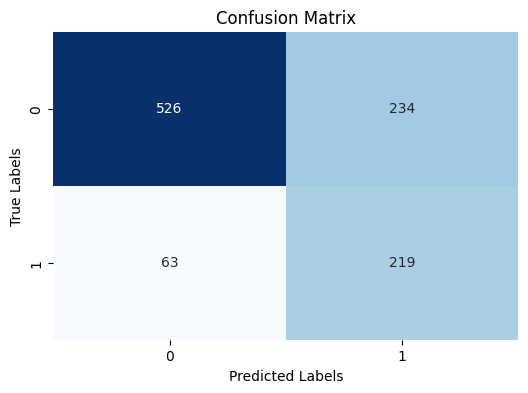


Class-wise Accuracy:
Class 0: 526/760 (69.21%)
Class 1: 219/282 (77.66%)

Precision-Recall Curve:


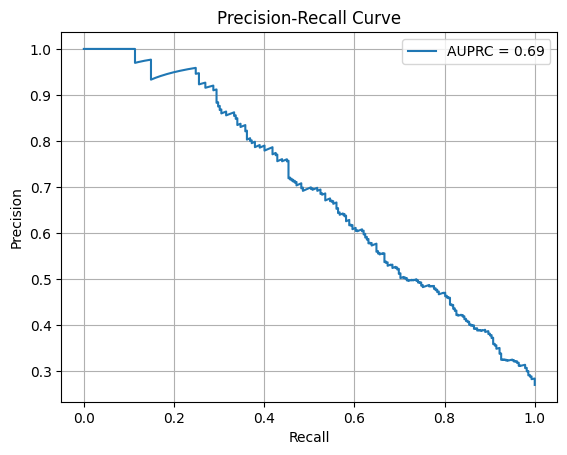


ROC Curve:


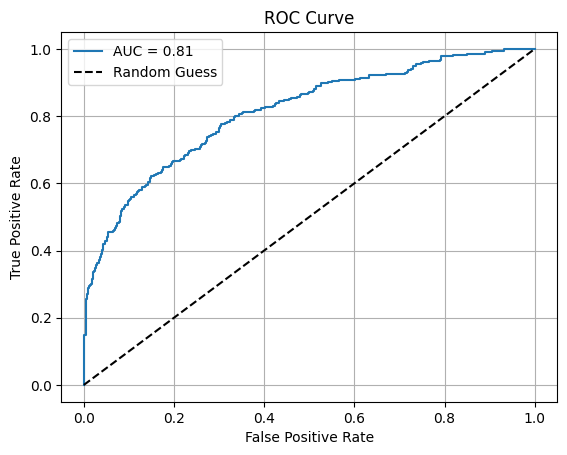


Mean F1 Score: 0.6879
Balanced Accuracy: 0.7344
Average AUPRC: 0.6921

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       760
           1       0.48      0.78      0.60       282

    accuracy                           0.71      1042
   macro avg       0.69      0.73      0.69      1042
weighted avg       0.78      0.71      0.73      1042

Fold No: 4
Epoch [1/100], Loss: 0.7180, Accuracy: 0.5044
Validation Loss: 0.6585, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6835, Accuracy: 0.5819
Validation Loss: 0.7566, Validation Accuracy: 0.5525
Epoch [3/100], Loss: 0.6583, Accuracy: 0.6593
Validation Loss: 0.6881, Validation Accuracy: 0.6300
Epoch [4/100], Loss: 0.6337, Accuracy: 0.7036
Validation Loss: 0.6652, Validation Accuracy: 0.6876
Epoch [5/100], Loss: 0.6072, Accuracy: 0.7613
Validation Loss: 0.6189, Validation Accuracy: 0.7106
Epoch [6/100], Loss: 0.6065, Accuracy: 0.7490
Validation Loss: 0.6472, V

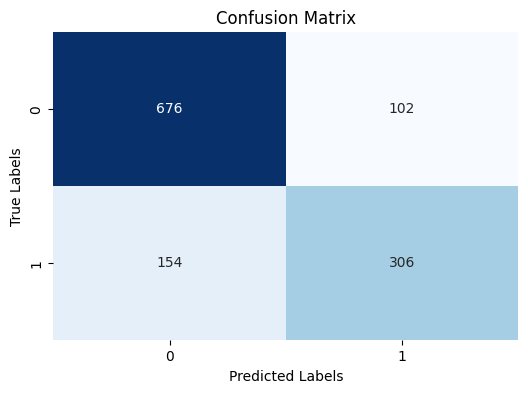


Class-wise Accuracy:
Class 0: 676/778 (86.89%)
Class 1: 306/460 (66.52%)

Precision-Recall Curve:


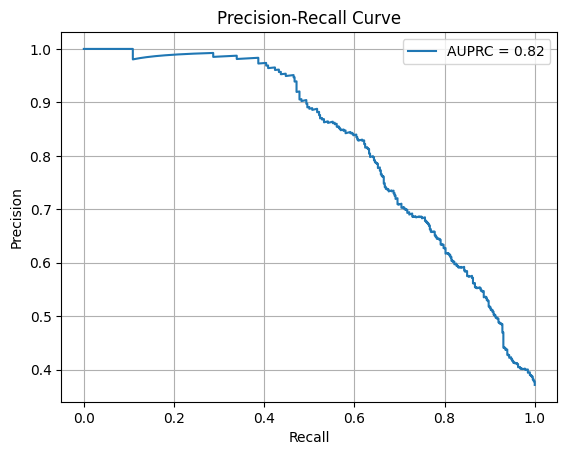


ROC Curve:


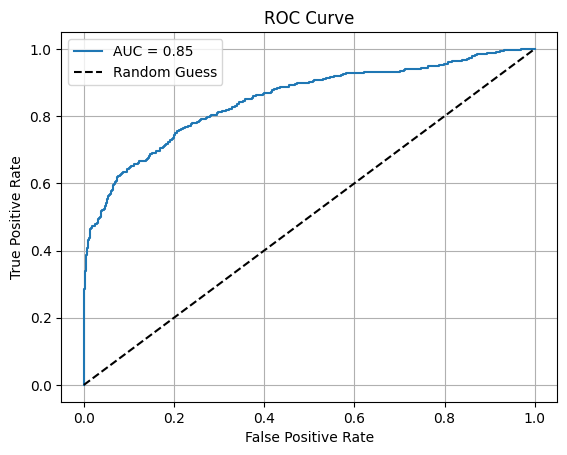


Mean F1 Score: 0.7729
Balanced Accuracy: 0.7671
Average AUPRC: 0.8233

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       778
           1       0.75      0.67      0.71       460

    accuracy                           0.79      1238
   macro avg       0.78      0.77      0.77      1238
weighted avg       0.79      0.79      0.79      1238

Fold No: 5
Epoch [1/100], Loss: 0.7275, Accuracy: 0.4963
Validation Loss: 0.6770, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6998, Accuracy: 0.5018
Validation Loss: 0.6777, Validation Accuracy: 0.5000
Epoch [3/100], Loss: 0.6765, Accuracy: 0.6057
Validation Loss: 0.6308, Validation Accuracy: 0.6624
Epoch [4/100], Loss: 0.6378, Accuracy: 0.7068
Validation Loss: 0.6594, Validation Accuracy: 0.7104
Epoch [5/100], Loss: 0.6211, Accuracy: 0.7383
Validation Loss: 0.6101, Validation Accuracy: 0.7582
Epoch [6/100], Loss: 0.5893, Accuracy: 0.7841
Validation Loss: 0.5942, V

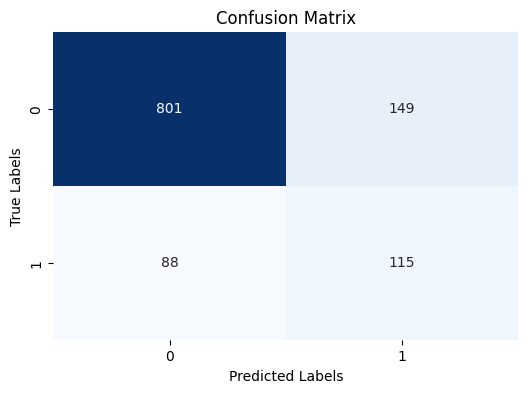


Class-wise Accuracy:
Class 0: 801/950 (84.32%)
Class 1: 115/203 (56.65%)

Precision-Recall Curve:


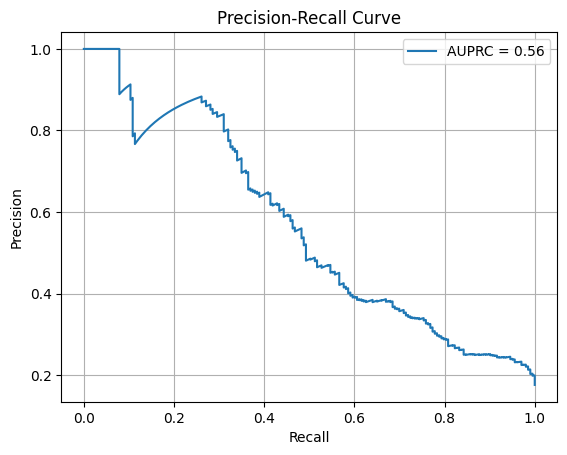


ROC Curve:


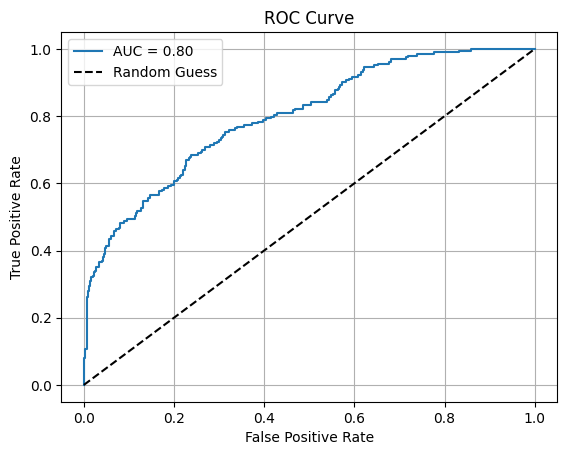


Mean F1 Score: 0.6818
Balanced Accuracy: 0.7048
Average AUPRC: 0.5617

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       950
           1       0.44      0.57      0.49       203

    accuracy                           0.79      1153
   macro avg       0.67      0.70      0.68      1153
weighted avg       0.82      0.79      0.80      1153


RESULTS FOR PARAMETER SET 5:
Balanced Accuracy for each fold: ['0.6710', '0.7353', '0.7344', '0.7671', '0.7048']
Average Balanced Accuracy across all folds: 0.7225
Best fold (Fold 4) class-wise accuracy: ['0.8689', '0.6652']
AUPRC for each fold: ['0.6220', '0.7523', '0.6921', '0.8233', '0.5617']
Average AUPRC across all folds: 0.6903

SUMMARY OF ALL 5 PARAMETER SETS

Parameter Set 1:
Balanced Accuracy for each fold: ['0.6529', '0.5944', '0.7613', '0.7671', '0.6984']
Average Balanced Accuracy: 0.6948
Best fold class-wise accuracy: ['0.8278', '0.7065']
AUPRC for each fold:

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

# Parameter sets to test
parameter_sets = [
    {'ff_dim': 32, 'dropout_rate': 0.11542281673201528, 'embed_dim': 256, 'learning_rate': 5.726209095539437e-05, 'weight_decay': 4.566099590369729e-05, 'batch_size': 16, 'num_heads': 2, 'num_transformer_blocks': 4},
    {'ff_dim': 512, 'dropout_rate': 0.29722015100615246, 'embed_dim': 64, 'learning_rate': 0.00046269394870735754, 'weight_decay': 0.00011711458551829446, 'batch_size': 10, 'num_heads': 4, 'num_transformer_blocks': 1},
    {'ff_dim': 32, 'dropout_rate': 0.1069229904003147, 'embed_dim': 256, 'learning_rate': 0.00015525256911280537, 'weight_decay': 3.149880823421316e-05, 'batch_size': 16, 'num_heads': 4, 'num_transformer_blocks': 4},
    {'ff_dim': 32, 'dropout_rate': 0.10945213351235199, 'embed_dim': 256, 'learning_rate': 0.00015701457915942213, 'weight_decay': 2.5321469842206672e-05, 'batch_size': 16, 'num_heads': 4, 'num_transformer_blocks': 4},
    {'ff_dim': 256, 'dropout_rate': 0.2051768973953511, 'embed_dim': 128, 'learning_rate': 0.00011833585465114953, 'weight_decay': 1.384051137092256e-05, 'batch_size': 10, 'num_heads': 2, 'num_transformer_blocks': 8}
]

all_results = []

for param_idx, params in enumerate(parameter_sets):
    print(f"\n{'='*80}")
    print(f"PARAMETER SET {param_idx + 1}")
    print(f"{'='*80}")
    print(f"Parameters: {params}")
    print(f"{'='*80}\n")
    
    # Set parameters
    ff_dim = params['ff_dim']
    dropout_rate = params['dropout_rate']
    embed_dim = params['embed_dim']
    learning_rate = params['learning_rate']
    weight_decay = params['weight_decay']
    batch_size = params['batch_size']
    num_attention_heads = params['num_heads']
    num_transformer_blocks = params['num_transformer_blocks']
    
    fold_accuracies = []
    fold_confusion_matrices = []
    fold_auprcs = []
    test_folds_chosen = []
    val_folds_chosen = []

    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'Fold No: {fold_idx + 1}')
        
        # Initialize model, loss, and optimizer
        fold_model = TransformerModel(input_shape=input_shape, num_classes=num_classes,num_transformer_blocks=num_transformer_blocks,num_heads=num_attention_heads,ff_dim=ff_dim,embed_dim=embed_dim)
        fold_model.to(device)
        
        criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
        optimizer = optim.AdamW(fold_model.parameters(),weight_decay=weight_decay, lr=learning_rate)
        
        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.transpose(0, 3, 1, 2)  # Transpose to match PyTorch input format

        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)
        
        early_stopping = EarlyStopping(patience=10)
        
        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            
            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []
            
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold].transpose(0, 3, 1, 2)
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold].transpose(0, 3, 1, 2)
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)

        test_labels_binarized = test_labels_list
        test_auprcs = []

        precision, recall, _ = precision_recall_curve(test_labels_list, np.array(test_probs)[:, 1])
        auprc = auc(recall, precision)
        test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Final metrics across all folds for this parameter set
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)
    
    # Find best fold and its class-wise accuracy
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_cm = fold_confusion_matrices[best_fold_idx]
    best_fold_class_acc = np.diag(best_fold_cm) / np.sum(best_fold_cm, axis=1)
    
    print(f'\n{"="*50}')
    print(f'RESULTS FOR PARAMETER SET {param_idx + 1}:')
    print(f'{"="*50}')
    print(f'Balanced Accuracy for each fold: {[f"{acc:.4f}" for acc in fold_accuracies]}')
    print(f'Average Balanced Accuracy across all folds: {mean_accuracy:.4f}')
    print(f'Best fold (Fold {best_fold_idx + 1}) class-wise accuracy: {[f"{acc:.4f}" for acc in best_fold_class_acc]}')
    print(f'AUPRC for each fold: {[f"{auprc:.4f}" for auprc in fold_auprcs]}')
    print(f'Average AUPRC across all folds: {average_auprc:.4f}')
    
    # Store results
    all_results.append({
        'parameter_set': param_idx + 1,
        'parameters': params,
        'fold_accuracies': fold_accuracies,
        'mean_accuracy': mean_accuracy,
        'best_fold_class_acc': best_fold_class_acc,
        'fold_auprcs': fold_auprcs,
        'average_auprc': average_auprc
    })

# Summary of all parameter sets
print(f'\n{"="*80}')
print(f'SUMMARY OF ALL 5 PARAMETER SETS')
print(f'{"="*80}')

for i, result in enumerate(all_results):
    print(f'\nParameter Set {i + 1}:')
    print(f'Balanced Accuracy for each fold: {[f"{acc:.4f}" for acc in result["fold_accuracies"]]}')
    print(f'Average Balanced Accuracy: {result["mean_accuracy"]:.4f}')
    print(f'Best fold class-wise accuracy: {[f"{acc:.4f}" for acc in result["best_fold_class_acc"]]}')
    print(f'AUPRC for each fold: {[f"{auprc:.4f}" for auprc in result["fold_auprcs"]]}')
    print(f'Average AUPRC: {result["average_auprc"]:.4f}')


In [13]:
model_description = f"TRANSFORMER MODEL CONCATENATED SPECTROGRAMS MANUAL APPROACH 2 CLASS"
save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_description,csv_path=fr"G:\CODING\py\newnotebooks\results.csv")

OSError: Cannot save file into a non-existent directory: 'G:\CODING\py\newnotebooks'